Mean Squared Error: 3.248076232486253


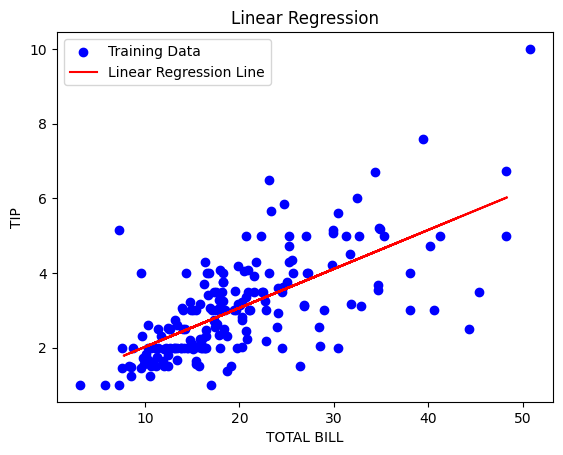

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bill2.csv')  # Replace 'your_dataset.csv' with the path to your actual dataset

# Extract the features (Annual Income) and target variable (Spending Score)
X = data['total_bill'].values.reshape(-1, 1)
y = data['tip'].values

# Split the dataset into training and testing sets
split_ratio = 0.8  # Split ratio for training and testing data
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Calculate the mean of the features and target variable
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

# Calculate the coefficients (slope and intercept) of the linear regression line
numerator = 0
denominator = 0

for i in range(len(X_train)):
    numerator += (X_train[i] - X_mean) * (y_train[i] - y_mean)
    denominator += (X_train[i] - X_mean) ** 2

slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

# Make predictions on the testing data
y_pred = []

for i in range(len(X_test)):
    y_pred.append(intercept + (slope * X_test[i]))

# Calculate the mean squared error
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

# Plot the regression line and scatter plot of the data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('TOTAL BILL')
plt.ylabel('TIP')
plt.title('Linear Regression')
plt.legend()
plt.show()
